In [3]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	Abrir as imagens coloridas e mostrar a imagem e seus histogramas (separados) cada canal de cor. Considerar os seguintes sistemas de cores:
a.	RGB
b.	HSV ou HSI
c.	Lab


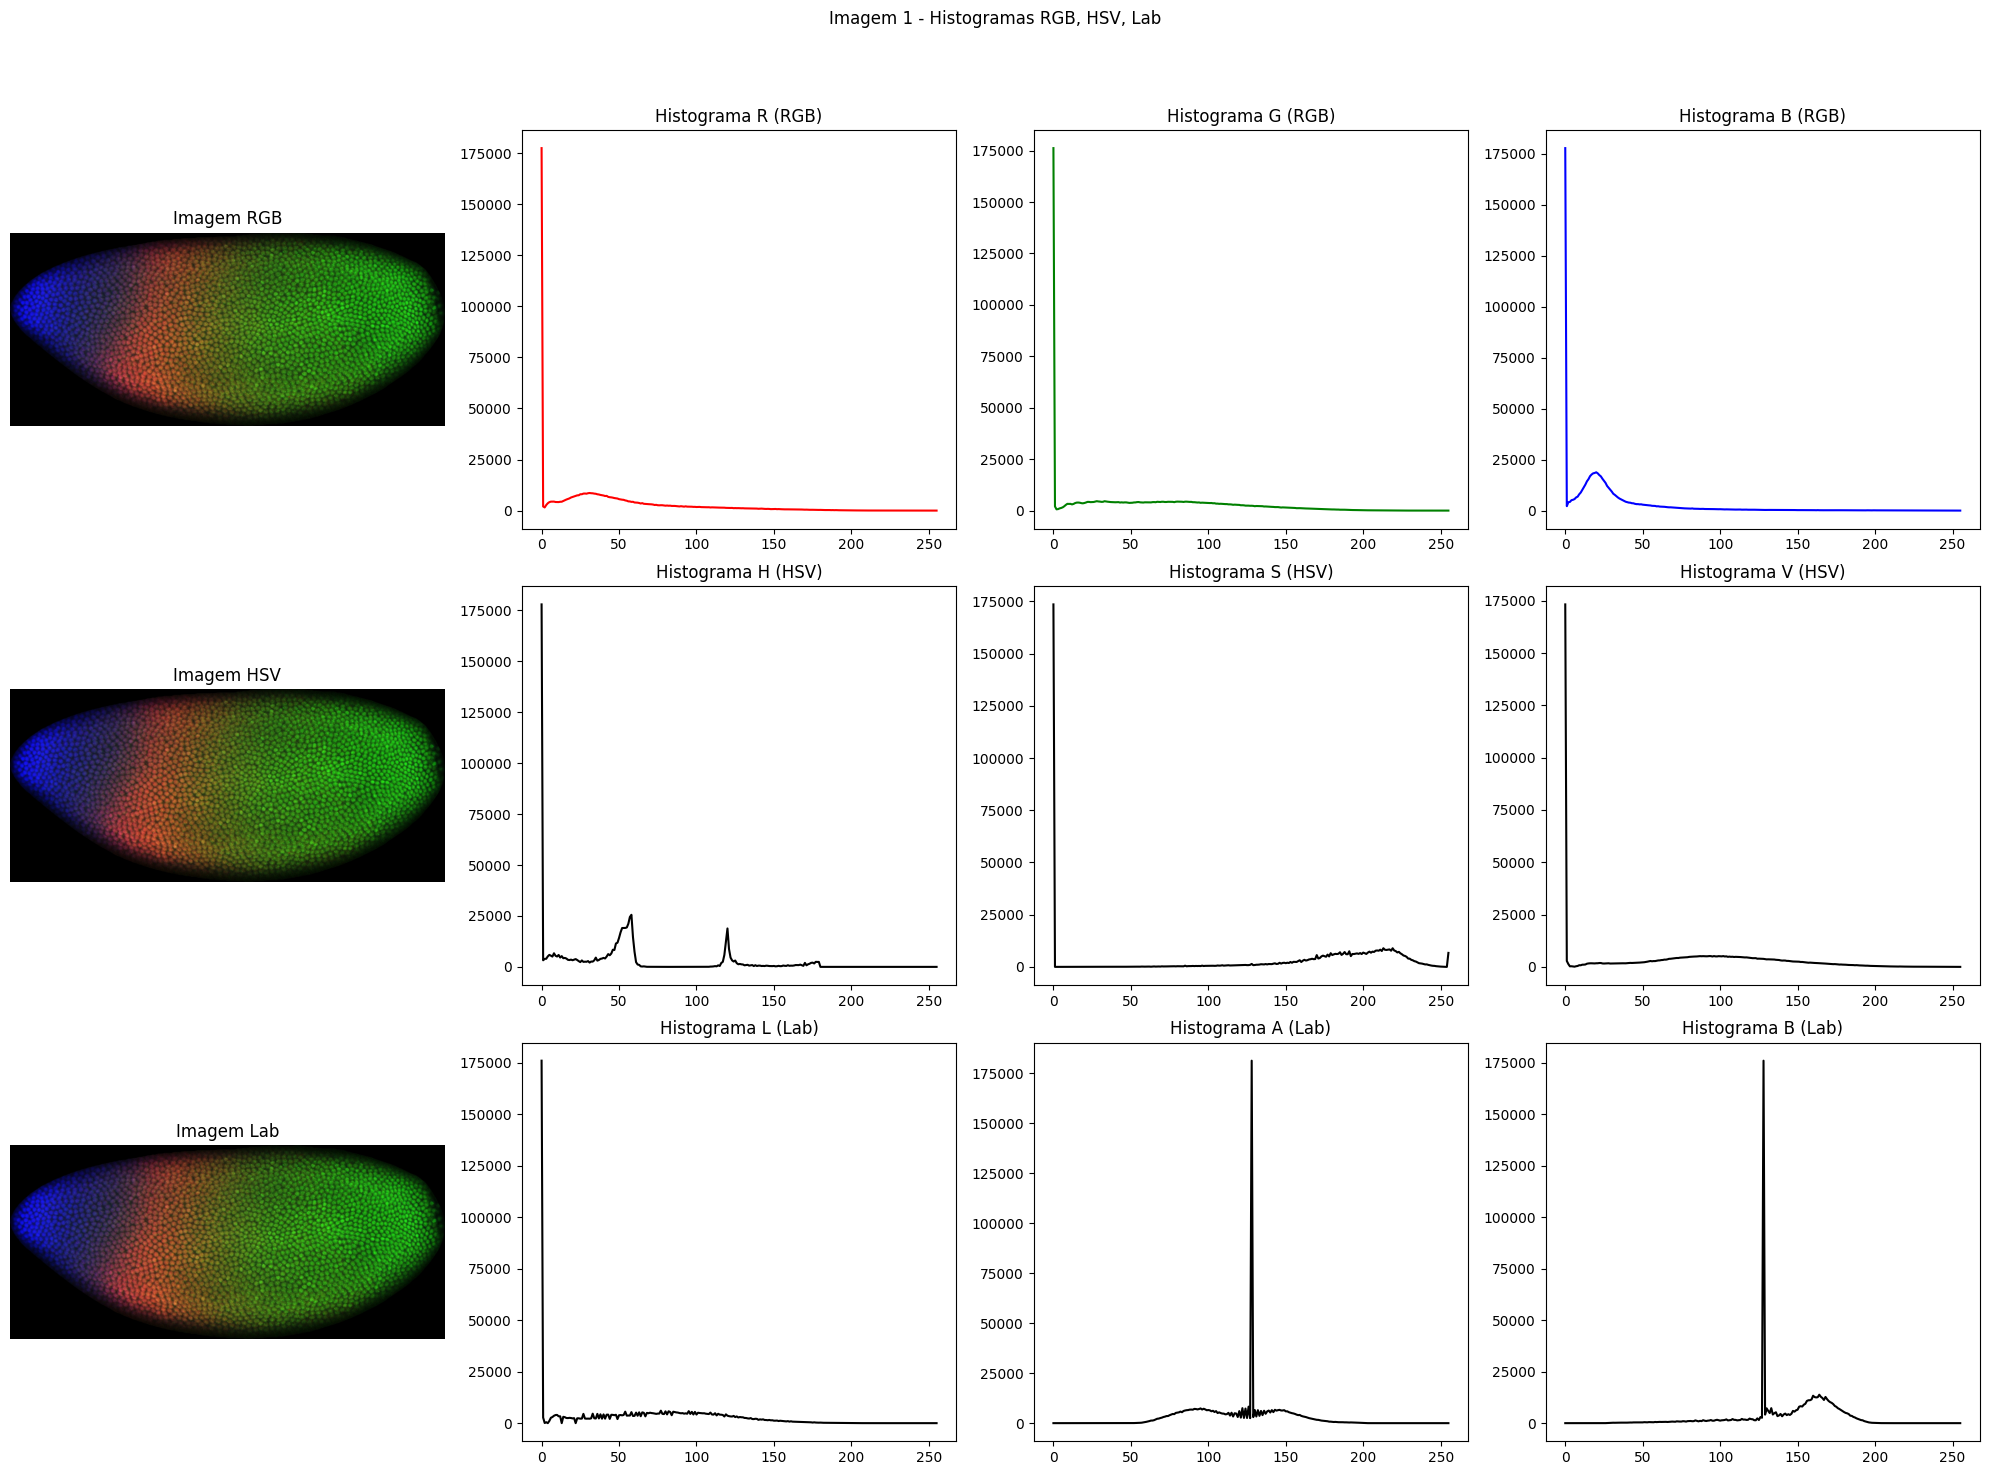

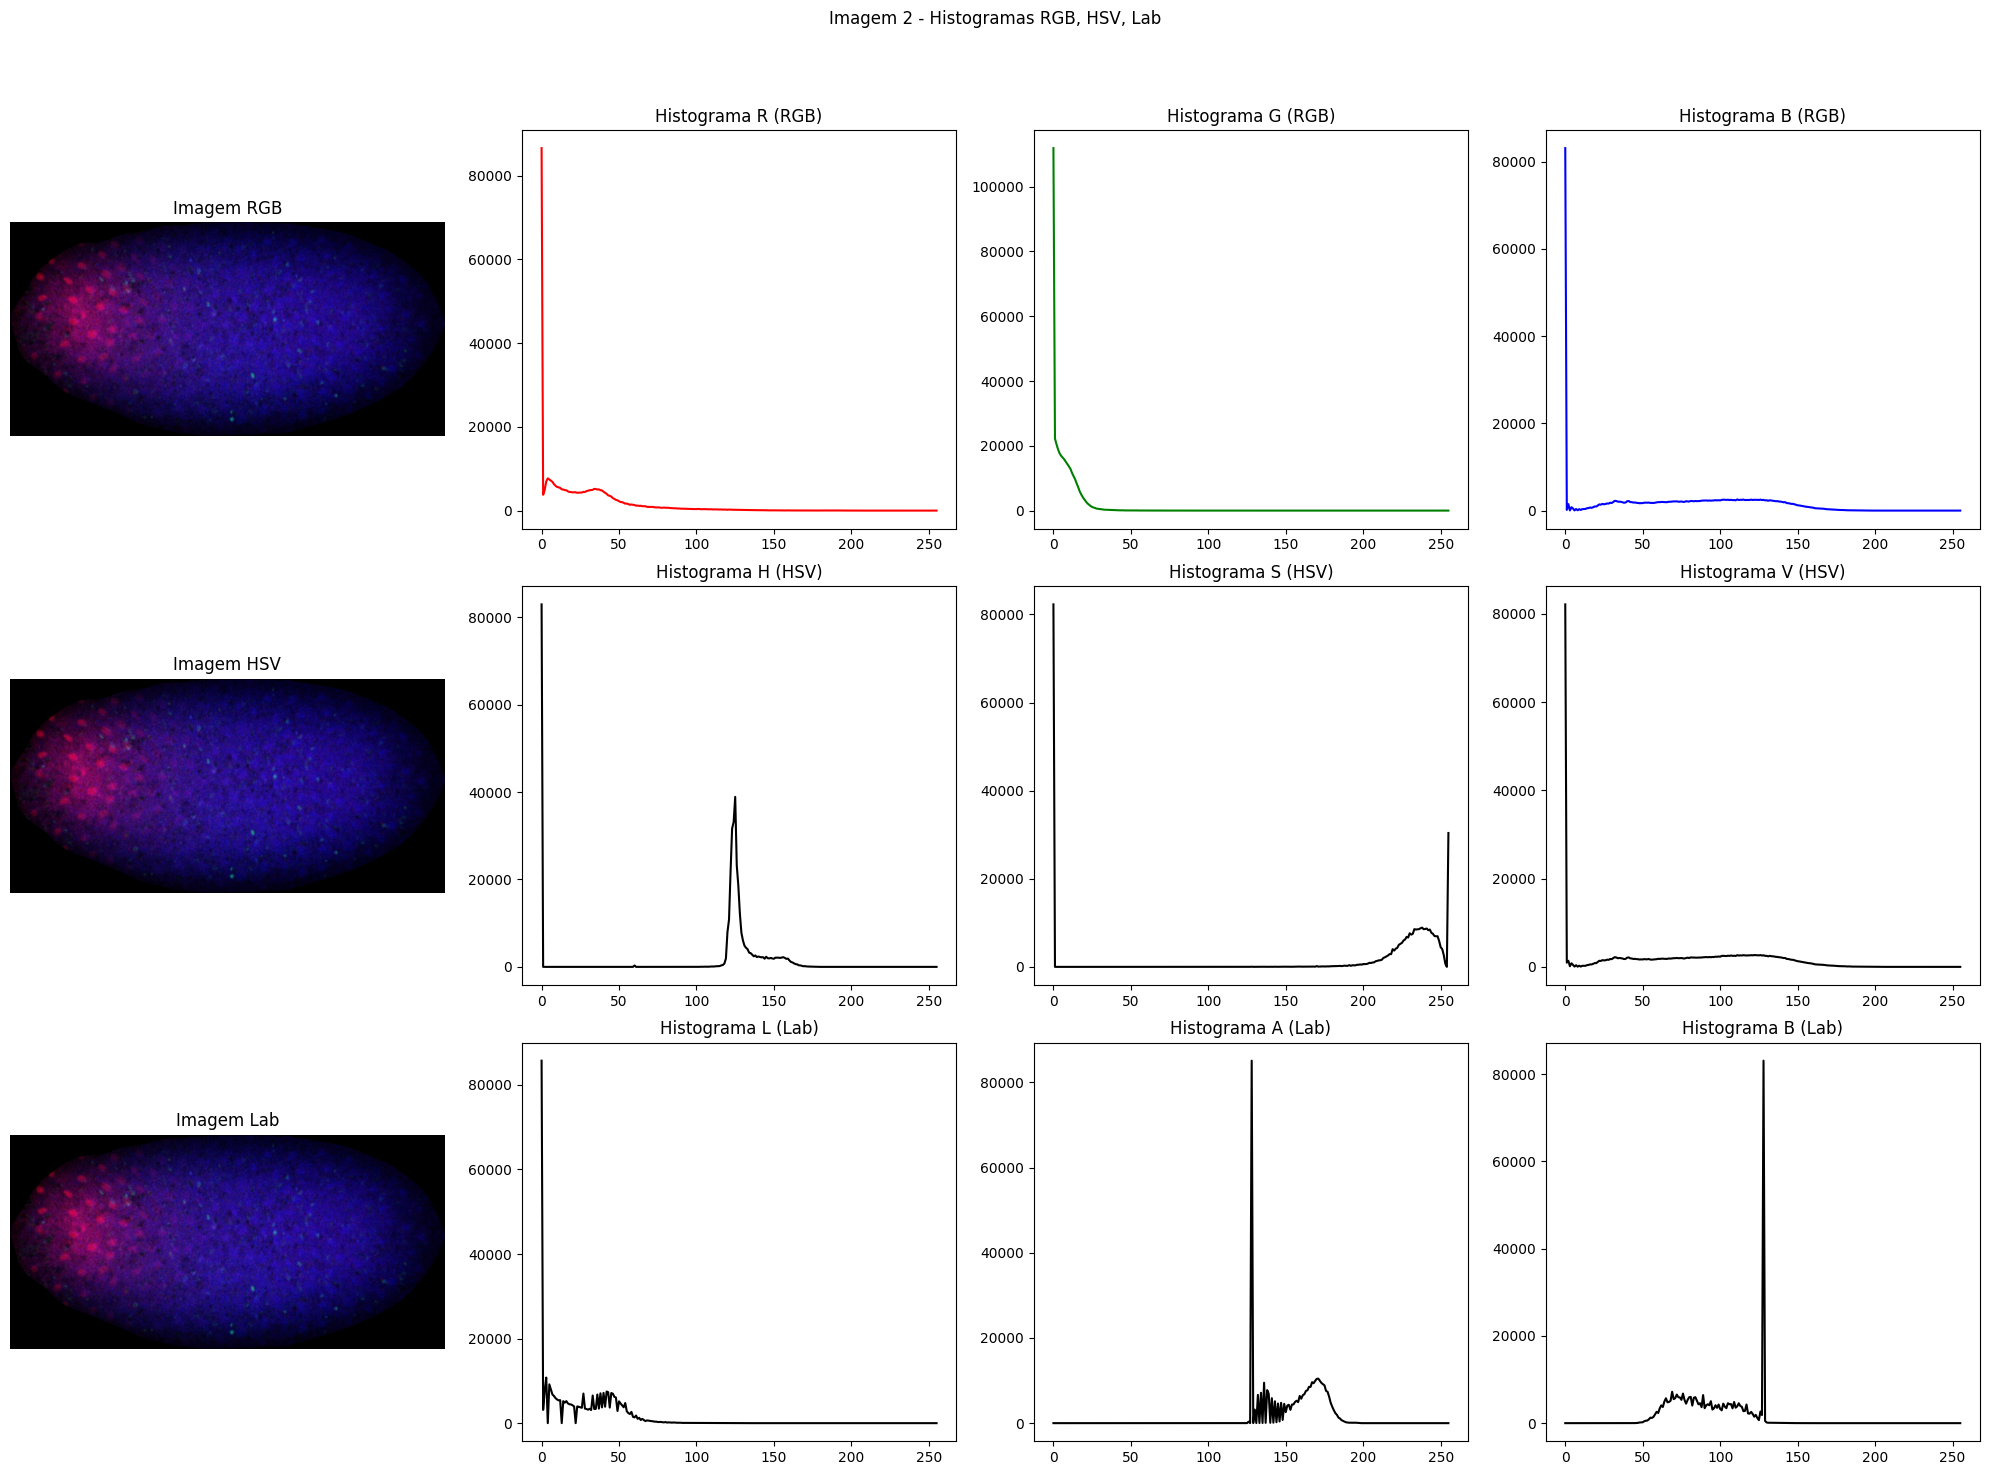

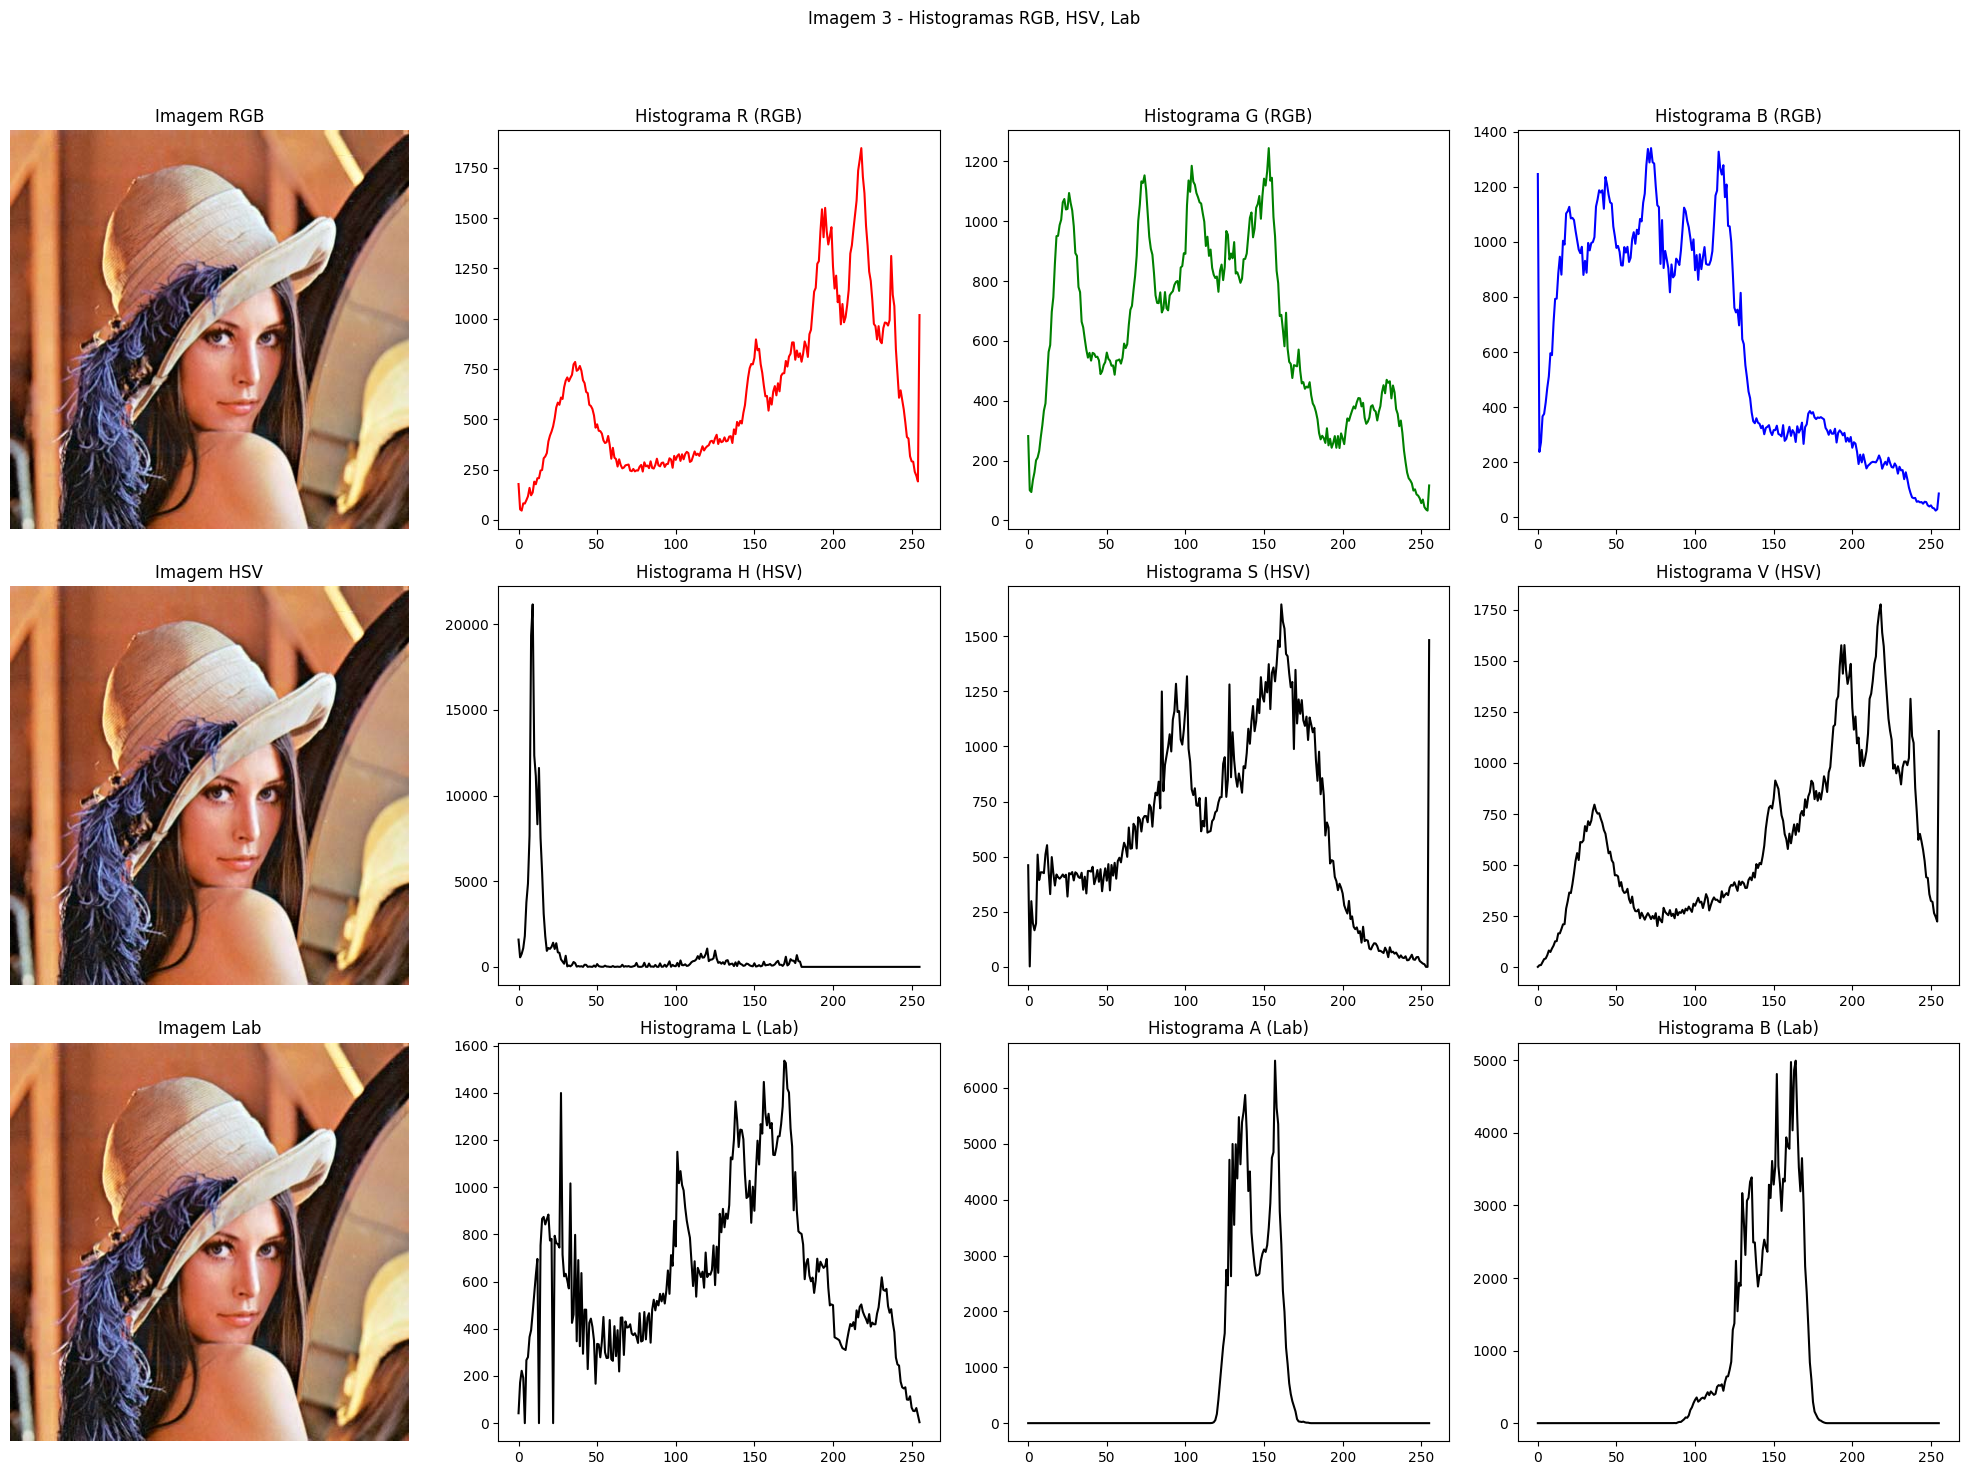

In [5]:
import cv2
import matplotlib.pyplot as plt


imagem1 = cv2.imread("image.jpg", cv2.IMREAD_COLOR)
imagem1_RGB = cv2.cvtColor(imagem1, cv2.COLOR_BGR2RGB)

imagem2 = cv2.imread("image2.jpg", cv2.IMREAD_COLOR)
imagem2_RGB = cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)

imagem3 = cv2.imread("Lenna.jpg", cv2.IMREAD_COLOR)
imagem3_RGB = cv2.cvtColor(imagem3, cv2.COLOR_BGR2RGB)


def exibir_histogramas(imagem_RGB, titulo):
    
    imagem_HSV = cv2.cvtColor(imagem_RGB, cv2.COLOR_RGB2HSV)
    imagem_Lab = cv2.cvtColor(imagem_RGB, cv2.COLOR_RGB2Lab)

    fig, axs = plt.subplots(3, 4, figsize=(20, 15))
    fig.suptitle(titulo)

    # Imagem RGB
    axs[0, 0].imshow(imagem_RGB)
    axs[0, 0].set_title("Imagem RGB")
    axs[0, 0].axis('off')

    # Histograma RGB
    cores = ('r', 'g', 'b')
    for i, cor in enumerate(cores):
        histograma = cv2.calcHist([imagem_RGB], [i], None, [256], [0, 256])
        axs[0, i+1].plot(histograma, color=cor)
        axs[0, i+1].set_title(f'Histograma {cor.upper()} (RGB)')

    # Imagem HSV
    axs[1, 0].imshow(cv2.cvtColor(imagem_HSV, cv2.COLOR_HSV2RGB))
    axs[1, 0].set_title("Imagem HSV")
    axs[1, 0].axis('off')

    # Histograma HSV
    componentes_HSV = ['H', 'S', 'V']
    for i, componente in enumerate(componentes_HSV):
        histograma = cv2.calcHist([imagem_HSV], [i], None, [256], [0, 256])
        axs[1, i+1].plot(histograma, color='k')
        axs[1, i+1].set_title(f'Histograma {componente} (HSV)')

    # Imagem Lab
    axs[2, 0].imshow(cv2.cvtColor(imagem_Lab, cv2.COLOR_Lab2RGB))
    axs[2, 0].set_title("Imagem Lab")
    axs[2, 0].axis('off')

    # Histograma Lab
    componentes_Lab = ['L', 'A', 'B']
    for i, componente in enumerate(componentes_Lab):
        histograma = cv2.calcHist([imagem_Lab], [i], None, [256], [0, 256])
        axs[2, i+1].plot(histograma, color='k')
        axs[2, i+1].set_title(f'Histograma {componente} (Lab)')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()


exibir_histogramas(imagem1_RGB, "Imagem 1 - Histogramas RGB, HSV, Lab")
exibir_histogramas(imagem2_RGB, "Imagem 2 - Histogramas RGB, HSV, Lab")
exibir_histogramas(imagem3_RGB, "Imagem 3 - Histogramas RGB, HSV, Lab")

2)	Utilizando a imagem do mandrill, faça rotinas para detecção do focinho (região vermelha e azul). Utilize algum algoritmo de limiarização.

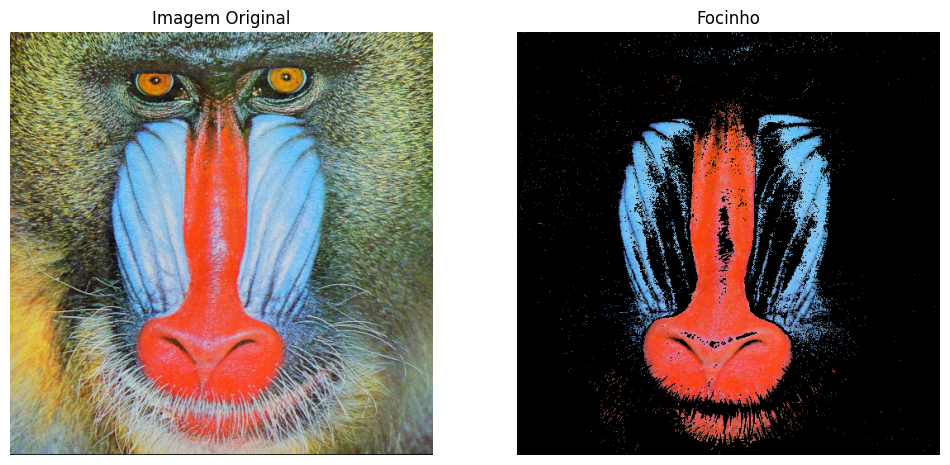

In [6]:
"""2)	Utilizando a imagem do mandrill, faça rotinas para detecção do focinho (região vermelha e azul). Utilize algum algoritmo de limiarização."""

import cv2
import numpy as np
import matplotlib.pyplot as plt


carregada = 'mandrill.tiff'
image = cv2.imread(carregada)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


red_mask1 = cv2.inRange(image_hsv, np.array([0, 100, 100]), np.array([10, 255, 255]))
red_mask2 = cv2.inRange(image_hsv, np.array([160, 100, 100]), np.array([180, 255, 255]))
red_mask = cv2.bitwise_or(red_mask1, red_mask2)
blue_mask = cv2.inRange(image_hsv, np.array([100, 100, 100]), np.array([140, 255, 255]))

combined_mask = cv2.bitwise_or(red_mask, blue_mask)

imagem_final = cv2.bitwise_and(image, image, mask=combined_mask)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagem Original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Focinho')
plt.imshow(cv2.cvtColor(imagem_final, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

3)	Utilizando a imagem HE.jpg, tente detectar e contar a quantidade de núcleos celulares (em azul). Aplicar o Ostu para os 9 canais de cores e avaliar qual foi melhor (R,G,B,H,S,V,L,a,b)

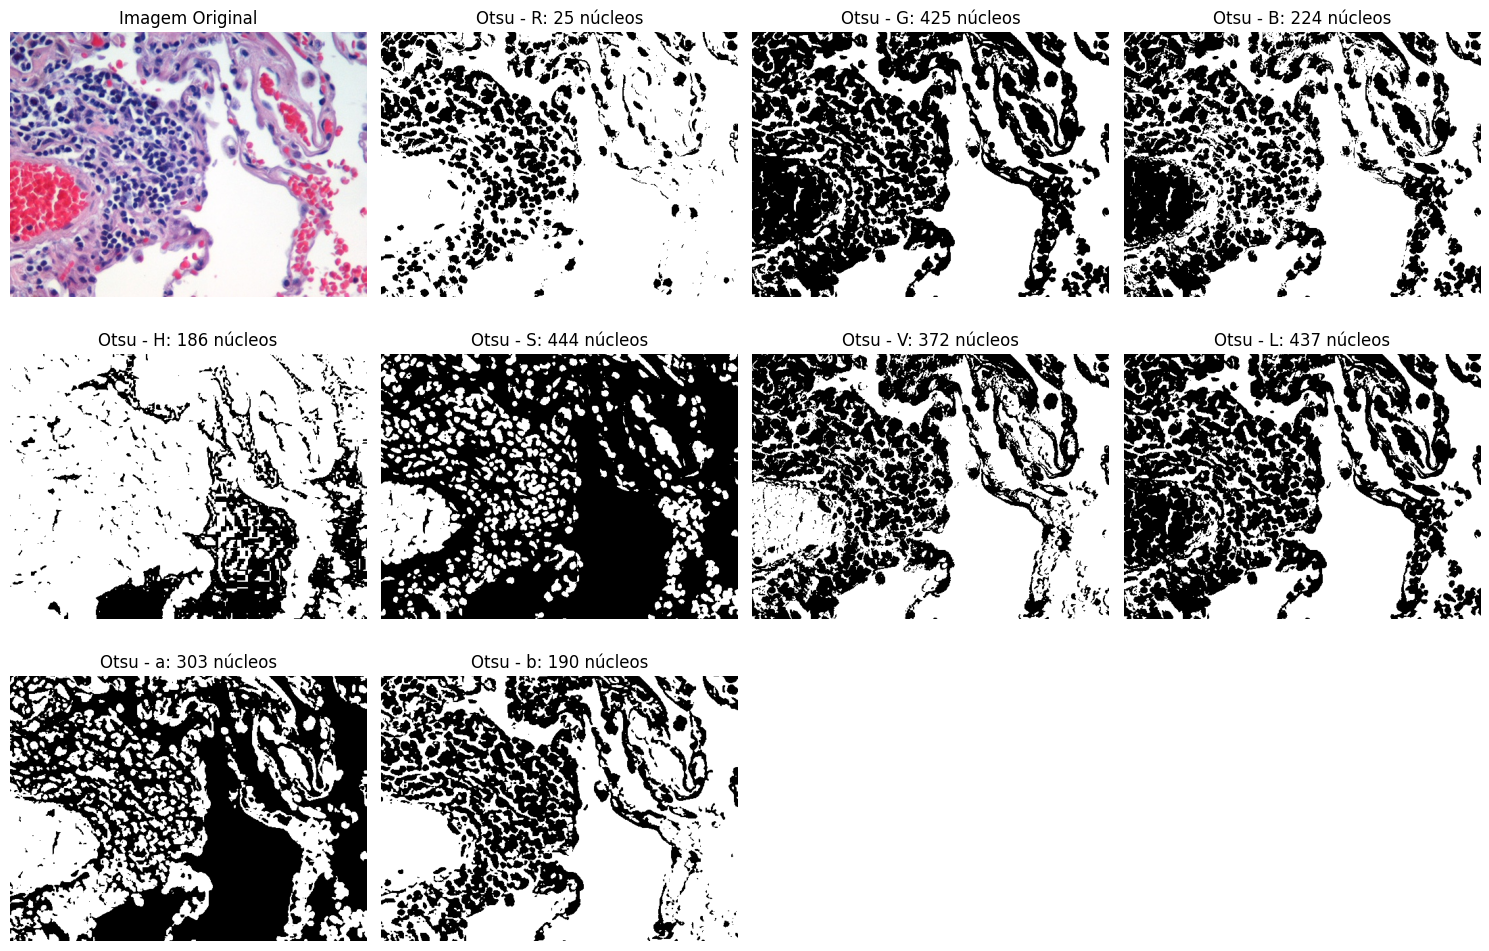

Contagem de núcleos por canal:
R: 25 núcleos
G: 425 núcleos
B: 224 núcleos
H: 186 núcleos
S: 444 núcleos
V: 372 núcleos
L: 437 núcleos
a: 303 núcleos
b: 190 núcleos


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def otsu_count(channel):
    _, thresh = cv2.threshold(channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return len(contours), thresh


img = 'HE.jpg'
image = cv2.imread(img)

if image is None:
    print(f"Falha ao carregar a imagem '{img}'.")
else:

    image_rgb = cv2.split(image)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)


    channels = {
        "R": image_rgb[2],
        "G": image_rgb[1],
        "B": image_rgb[0],
        "H": image_hsv[:, :, 0],
        "S": image_hsv[:, :, 1],
        "V": image_hsv[:, :, 2],
        "L": image_lab[:, :, 0],
        "a": image_lab[:, :, 1],
        "b": image_lab[:, :, 2],
    }


    counts = {}
    thresh_images = {}
    for name, channel in channels.items():
        count, thresh = otsu_count(channel)
        counts[name] = count
        thresh_images[name] = thresh


    plt.figure(figsize=(15, 10))
    plt.subplot(3, 4, 1)
    plt.title('Imagem Original')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')


    for i, (name, thresh) in enumerate(thresh_images.items(), start=2):
        plt.subplot(3, 4, i)
        plt.title(f'Otsu - {name}: {counts[name]} núcleos')
        plt.imshow(thresh, cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


    print("Contagem de núcleos por canal:")
    for name, count in counts.items():
        print(f"{name}: {count} núcleos")